# Tut-14 : CodeBasics

# Naive Bayes Classifier

Condition Probability of a diamond queen where we already know it is a diamond :
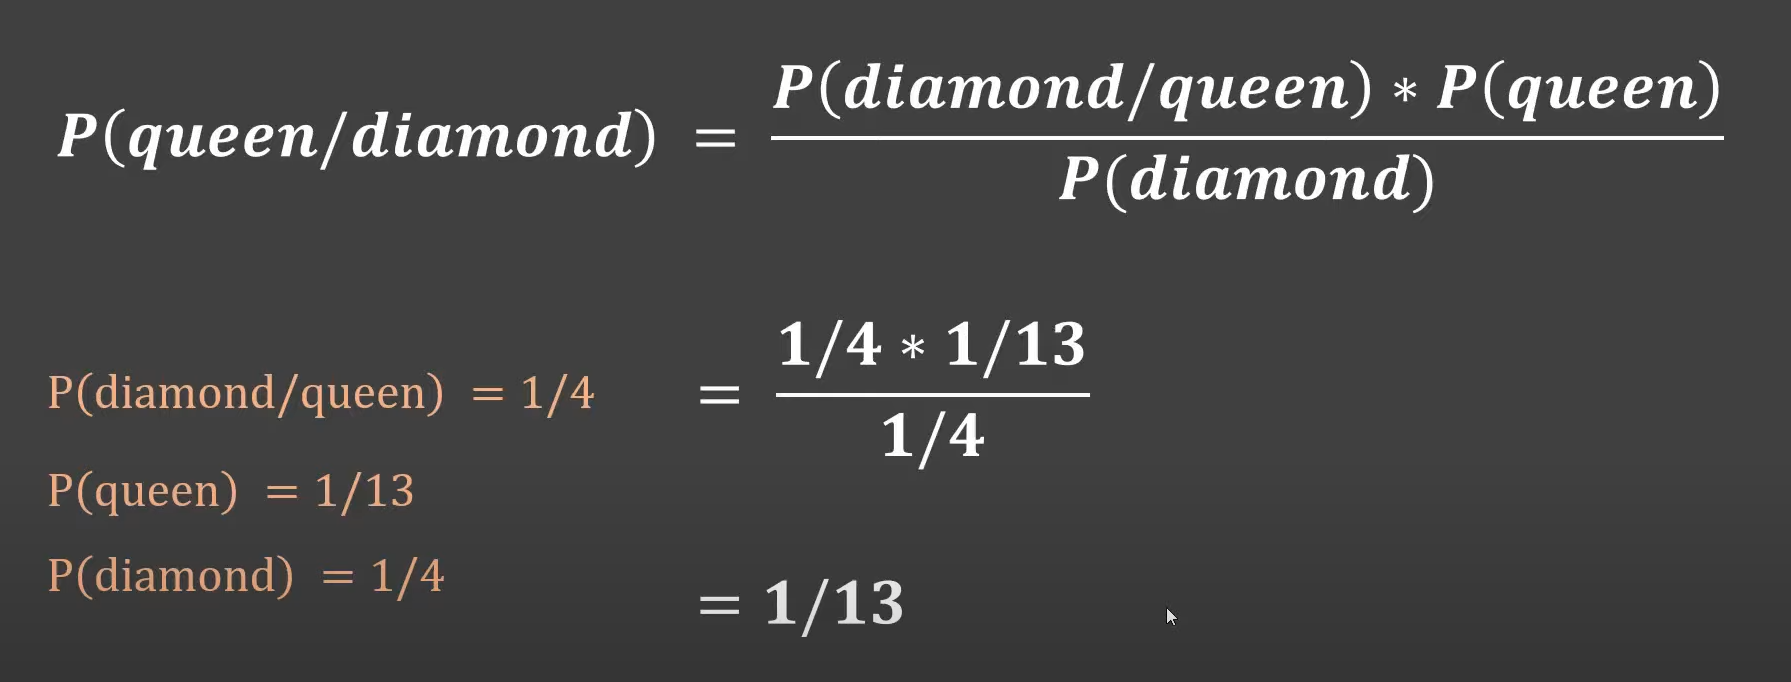

Probability of survival when titanic ship sunk :
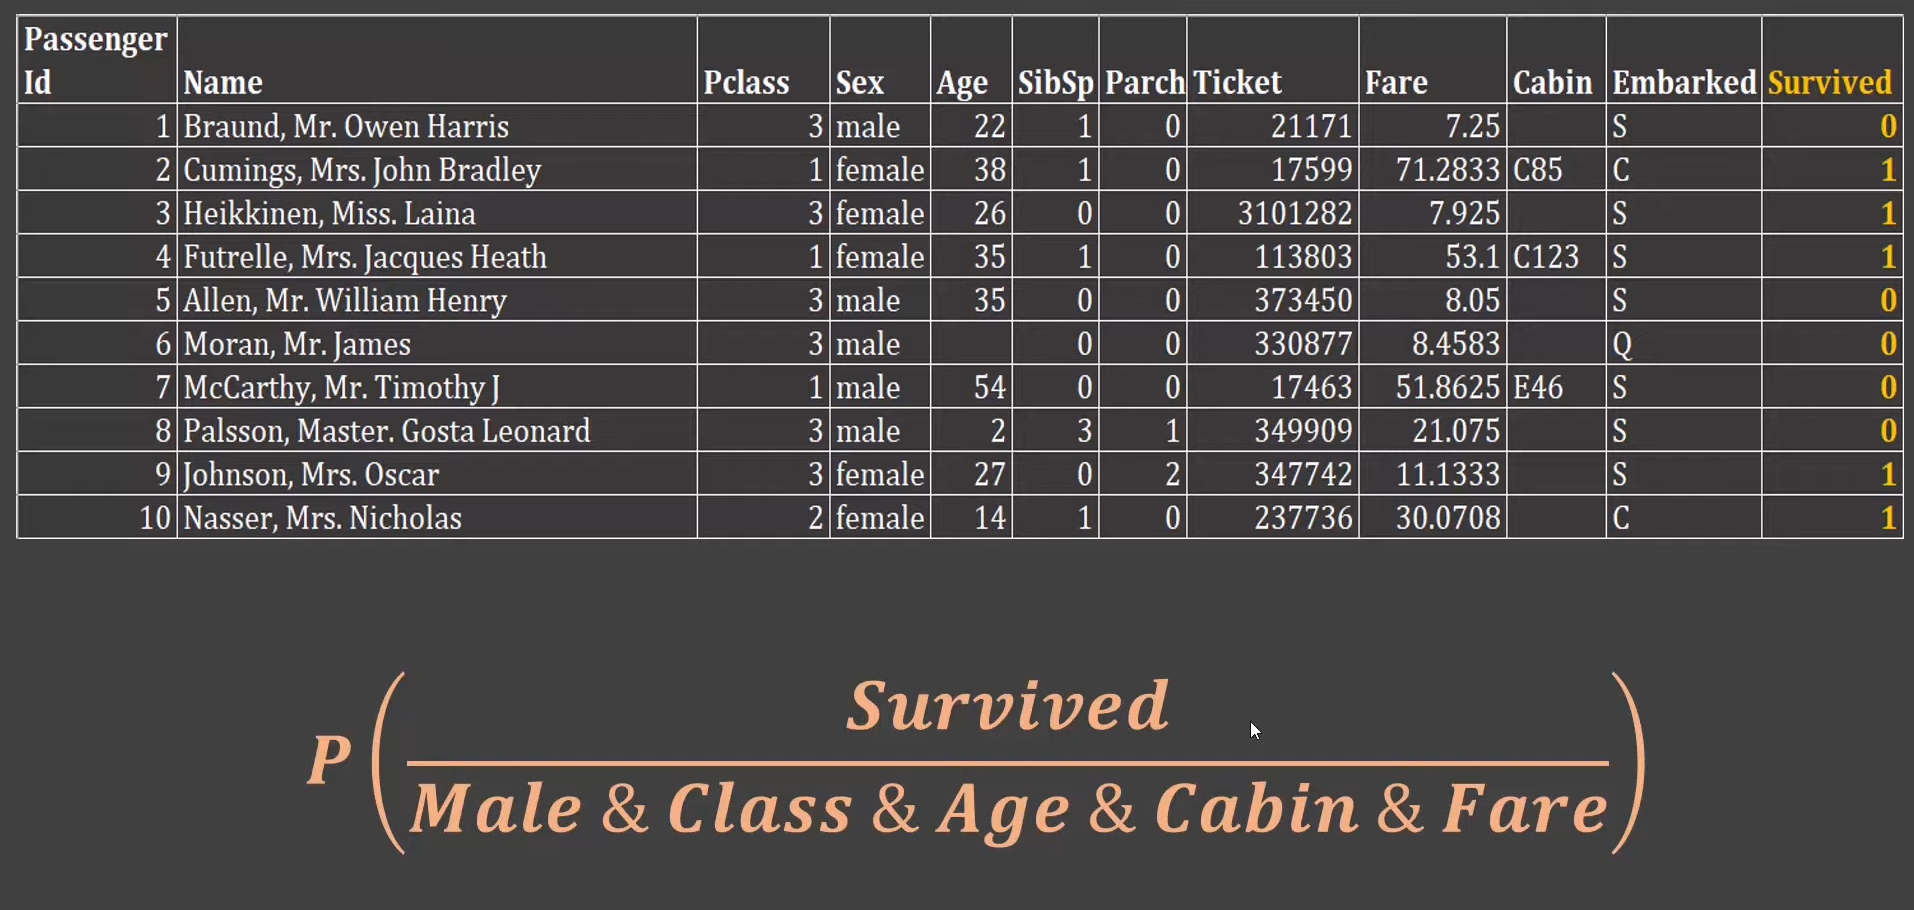

Make a naive assumption that features such as male, class, age , cabin, fare etc are independent of each other



Consider a spam , no-spam message classifier :

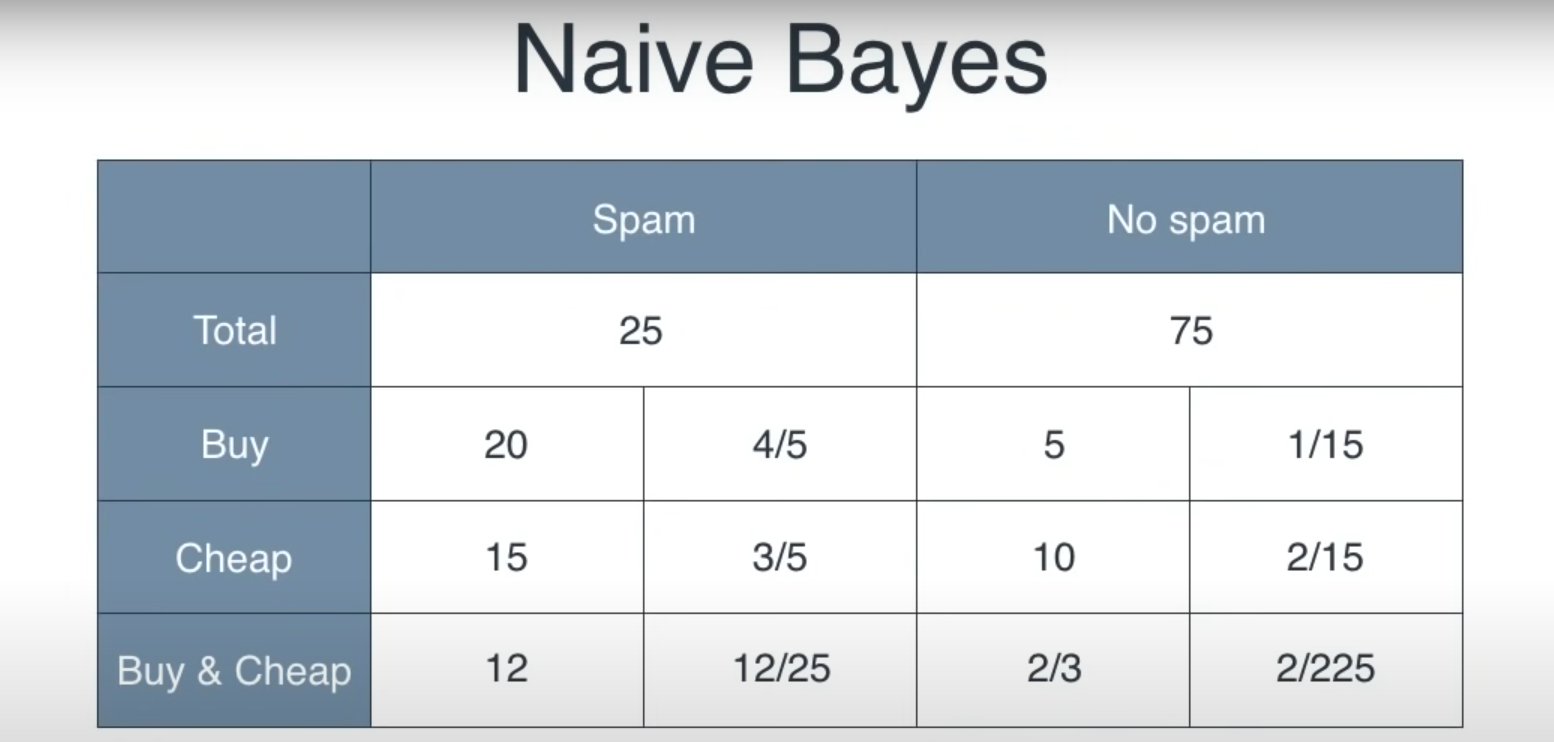

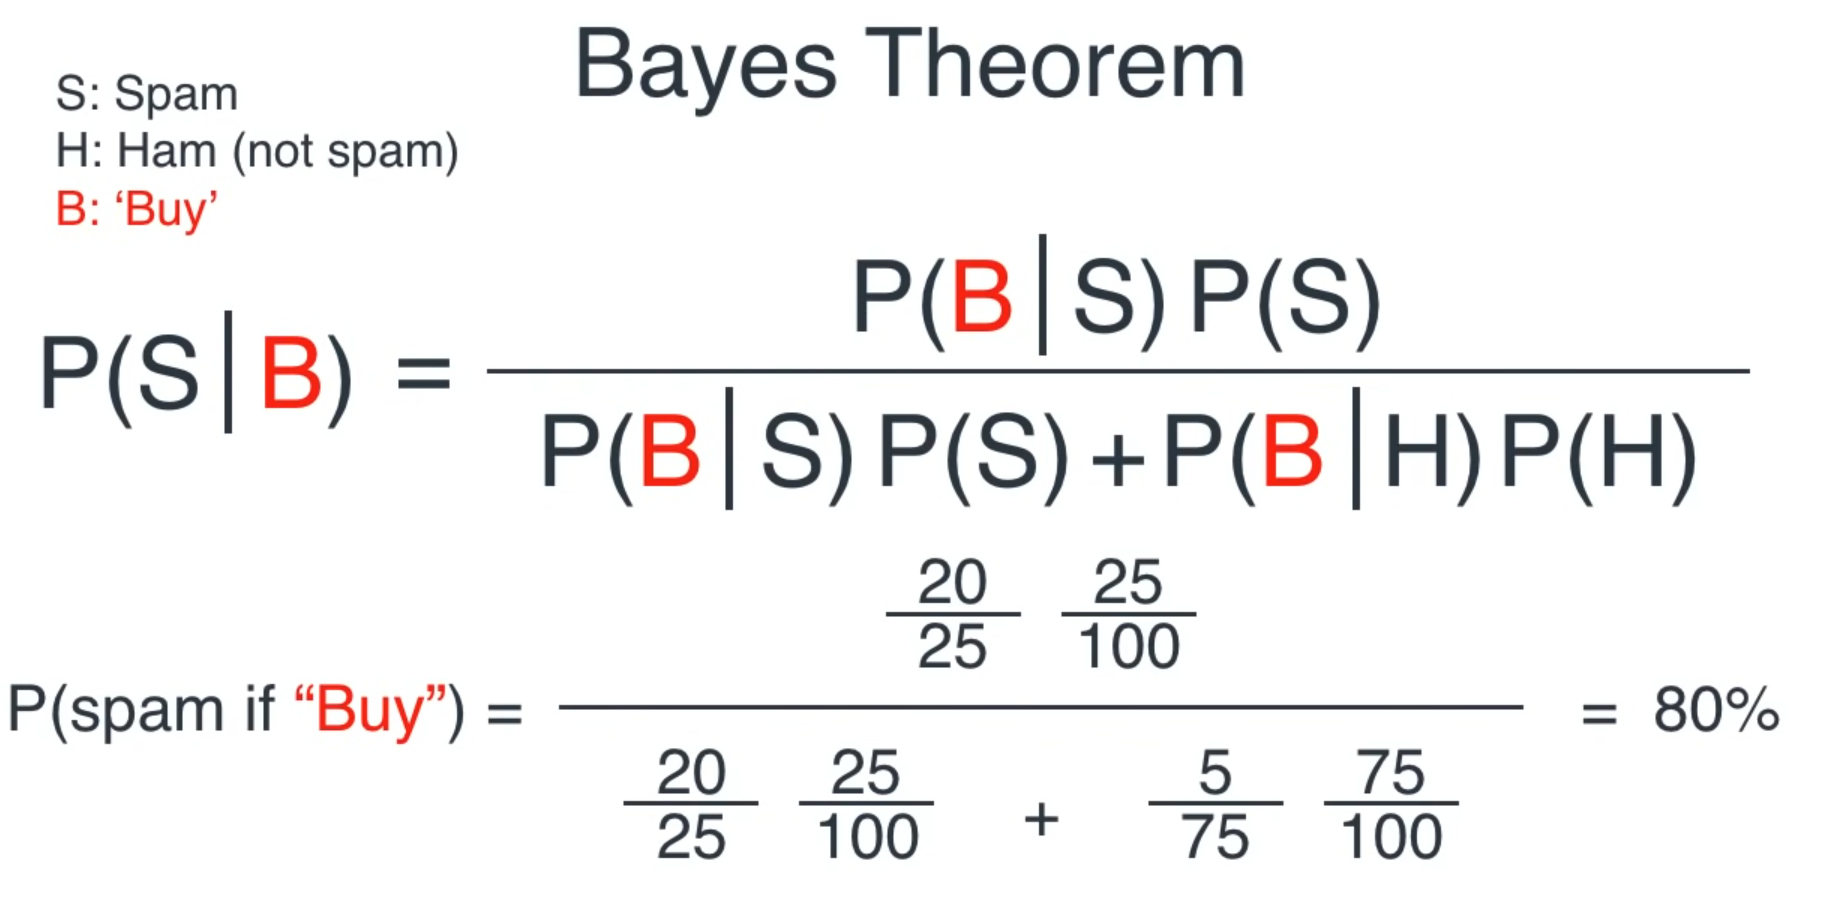

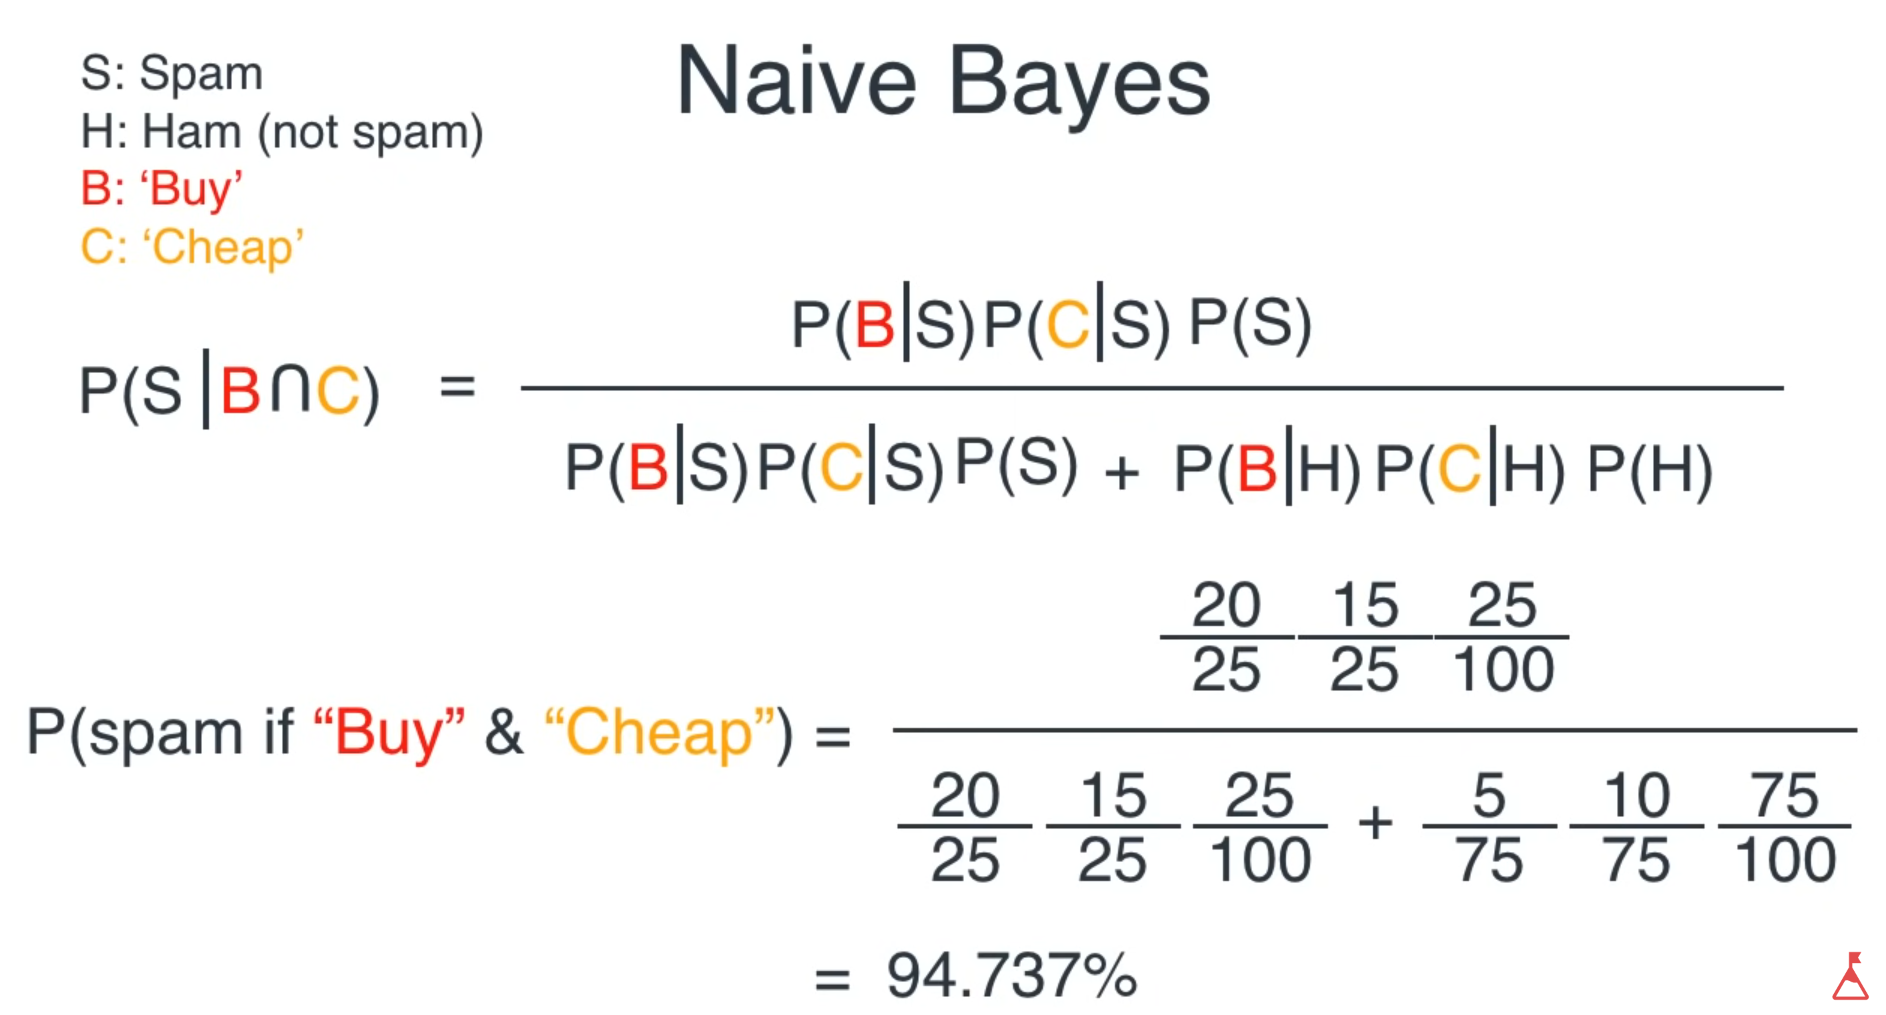

In [5]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df.head()

PassengerId                                               Name  Pclass  \
0            1                            Braund, Mr. Owen Harris       3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2            3                             Heikkinen, Miss. Laina       3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4            5                           Allen, Mr. William Henry       3   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [6]:
df = df.drop( ['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'] , axis='columns')
df.head()

Pclass     Sex   Age     Fare  Survived
0       3    male  22.0   7.2500         0
1       1  female  38.0  71.2833         1
2       3  female  26.0   7.9250         1
3       1  female  35.0  53.1000         1
4       3    male  35.0   8.0500         0

In [17]:
target = df.Survived
inputs = df.drop(['Survived'] , axis= 'columns' )
inputs.head()

Pclass     Sex   Age     Fare
0       3    male  22.0   7.2500
1       1  female  38.0  71.2833
2       3  female  26.0   7.9250
3       1  female  35.0  53.1000
4       3    male  35.0   8.0500

In [18]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1

In [19]:
inputs = pd.concat( [inputs , dummies] , axis='columns' )
inputs.drop(['Sex'] , axis='columns' , inplace=True )
inputs.head()

Pclass   Age     Fare  female  male
0       3  22.0   7.2500       0     1
1       1  38.0  71.2833       1     0
2       3  26.0   7.9250       1     0
3       1  35.0  53.1000       1     0
4       3  35.0   8.0500       0     1

In [20]:
inputs.columns[inputs.isna().any()]    # finds weather any of the columns as NaN values

Index(['Age'], dtype='object')

In [21]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [23]:
inputs.Age.fillna( inputs.Age.mean() , inplace=True )
inputs.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
xtr , xts , ytr , yts = train_test_split( inputs , target , test_size=0.2 )

In [25]:
len(xtr)

712

In [26]:
len(xts)

179

In [31]:
# create Naive bayes model

# we use GaussianNB , bcoz our data is simple and gaussian

from sklearn.naive_bayes import GaussianNB 

mod = GaussianNB()
mod.fit( xtr , ytr )
mod.score( xts , yts )


0.7988826815642458

In [32]:
xtr[:10]

Pclass   Age     Fare  female  male
804       3  27.0   6.9750       0     1
575       3  19.0  14.5000       0     1
242       2  29.0  10.5000       0     1
9         2  14.0  30.0708       1     0
132       3  47.0  14.5000       1     0
404       3  20.0   8.6625       1     0
94        3  59.0   7.2500       0     1
620       3  27.0  14.4542       0     1
89        3  24.0   8.0500       0     1
858       3  24.0  19.2583       1     0

In [36]:
yts[:10]

184    1
19     1
791    0
502    0
677    1
577    1
121    0
627    1
262    0
38     0
Name: Survived, dtype: int64

In [38]:
y_pred = mod.predict( xts[:10] )
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [39]:
mod.predict_proba(xts[:10])

array([[0.02305278, 0.97694722],
       [0.04866401, 0.95133599],
       [0.96608799, 0.03391201],
       [0.04873495, 0.95126505],
       [0.03932206, 0.96067794],
       [0.00430995, 0.99569005],
       [0.98817418, 0.01182582],
       [0.00169484, 0.99830516],
       [0.73160165, 0.26839835],
       [0.03923728, 0.96076272]])

The different types of Naive Bayes are :

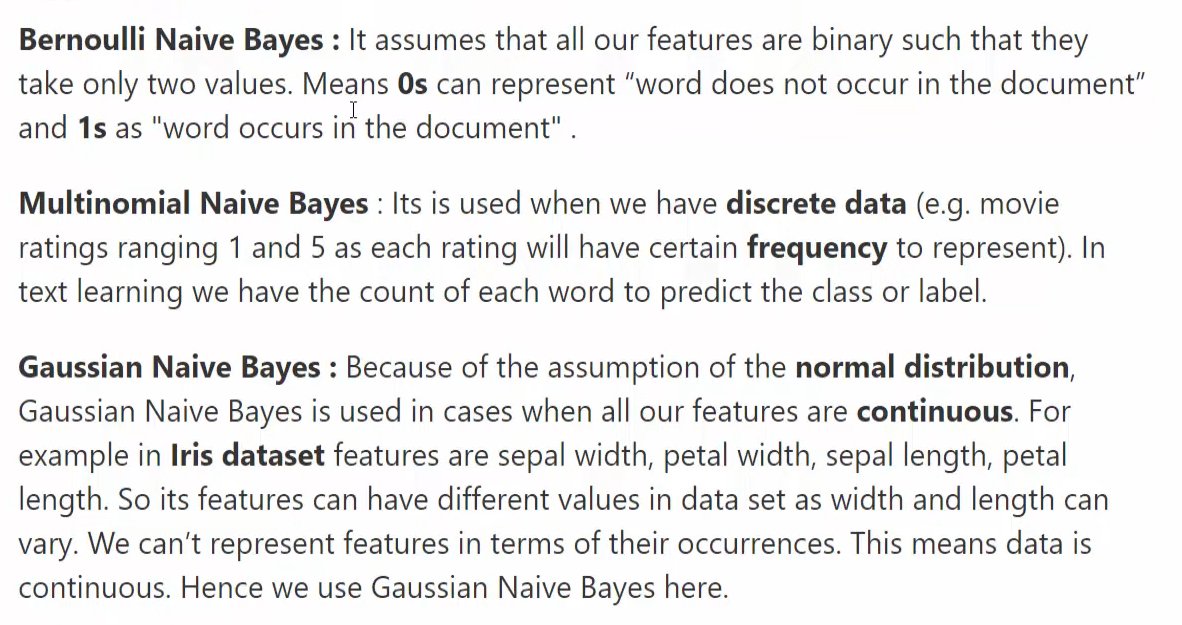